# Imports
---

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import spacy
from spacy import displacy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

# Loading Data
---

In [2]:
nlp = spacy.load("en_core_web_lg")

In [3]:
df = pd.read_csv('tweets.csv')
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [4]:
y = df.airline_sentiment
tweets = df.text

# Converting to Vectors
---

In [5]:
vectors = [nlp(t).vector for t in tweets]

In [6]:
y.size

14640

# Splitting
---

In [131]:
x_train = vectors[:12_000]
y_train = y[:12_000]
x_test = vectors[12_000:]
y_test = y[12_000:]

# KNN Classification
---

In [138]:
# yes, this function already exists in scipy.
def cosine_similarity(a, b):
    numerator = (a @ b)
    denominator = (norm(a) * norm(b))
    return 1 if denominator == 0 else 1 - (numerator / denominator)

In [136]:
knn = KNeighborsClassifier(n_neighbors=7, metric=cosine_similarity).fit(x_train, y_train)

In [137]:
knn.score(x_test, y_test)

0.7920454545454545

# KMeans
---

In [140]:
km = KMeans(n_clusters=3).fit(vectors, y)

# PCA
---

In [142]:
vectors_2d = PCA(n_components=2).fit_transform(vectors)

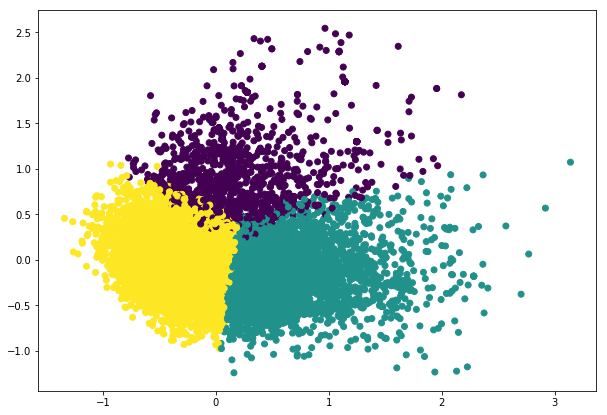

In [147]:
plt.figure(figsize=(10, 7))
plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c=km.labels_)
plt.show()

# Fin
---